In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

## Support Vector Machine

Text(0, 0.5, 'Feature 1')

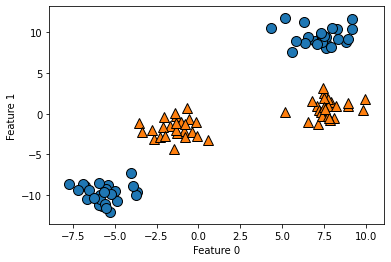

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\choib\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Feature 1')

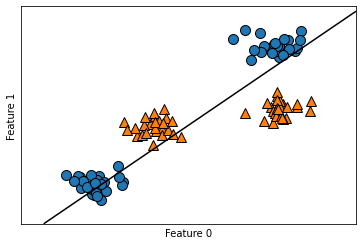

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\user\AppData\Local\Temp/ipykernel_27596/2394024094.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

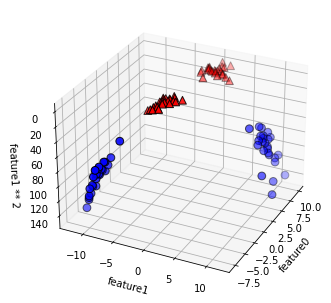

In [114]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\AppData\Local\Temp/ipykernel_27596/1615430027.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

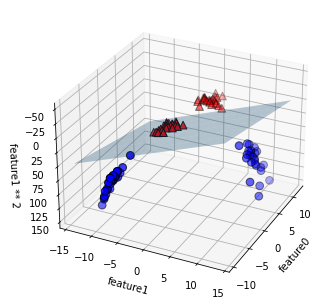

In [115]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

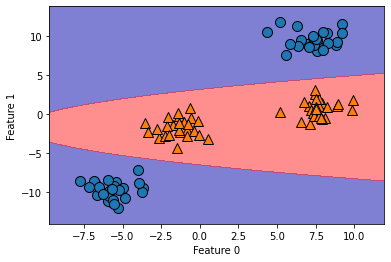

In [116]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

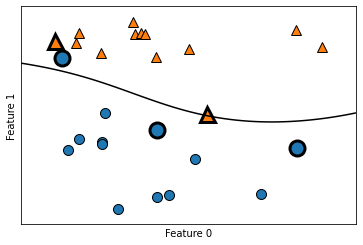

In [117]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters

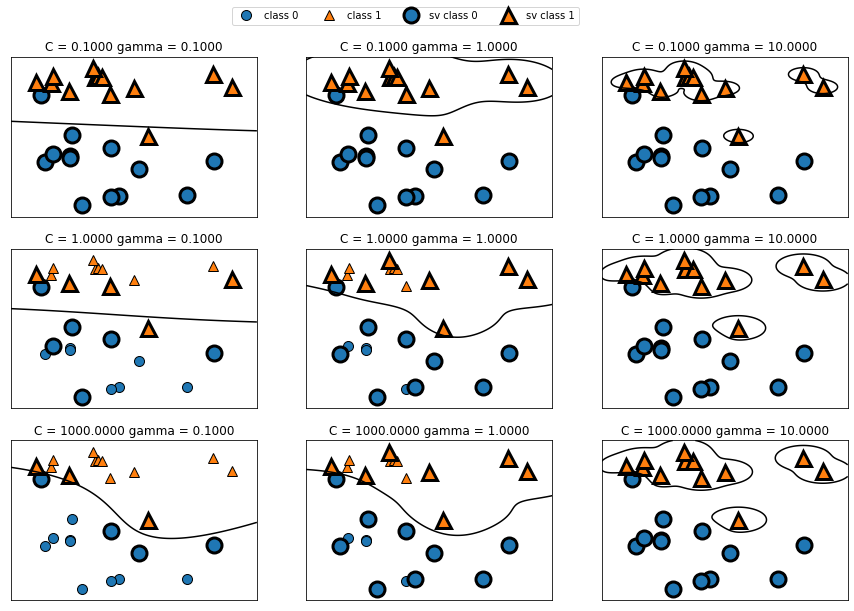

In [93]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [6]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

In [7]:
svc = SVC(C=100)
svc.fit(X_train, y_train)

SVC(C=100)

In [8]:
y_train_hat = svc.predict(X_train)
y_test_hat = svc.predict(X_test)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_hat)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_hat)))
print(confusion_matrix(y_test, y_test_hat))

Accuracy on training set: 0.94
Accuracy on test set: 0.94
[[48  5]
 [ 3 87]]


Text(0, 0.5, 'Feature magnitude')

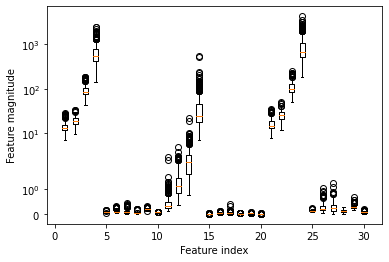

In [9]:
plt.boxplot(X_train, manage_ticks=False) #각 변수(30개)별 분포를 보기위해 그림.
plt.yscale("symlog") #값들의 scale 차이가 많이 남. -> scailing 진행.
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### Data Scaling

MinMax scaling manually

In [11]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))
# 0~1로 스케일링 됨.

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Text(0, 0.5, 'Feature magnitude')

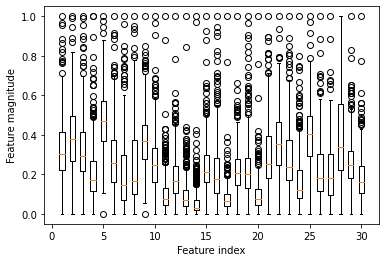

In [12]:
plt.boxplot(X_train_scaled, manage_ticks=False)
# plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [13]:
# use THE SAME transformation on the test set,
X_test_scaled = (X_test - min_on_training) / range_on_training

In [14]:
svc = SVC(C=100)
svc.fit(X_train_scaled, y_train)
y_train_hat = svc.predict(X_train_scaled)
y_test_hat = svc.predict(X_test_scaled)

print("Accuracy on training set: {:.2f}".format(accuracy_score(y_train, y_train_hat)))
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_test_hat)))
print(confusion_matrix(y_test, y_test_hat))
# 성능이 상당히 좋아짐. = svm은 스케일링에 민감하다.

Accuracy on training set: 1.00
Accuracy on test set: 0.97
[[51  2]
 [ 3 87]]


MinMax scaling using MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0, 0.5, 'Feature magnitude')

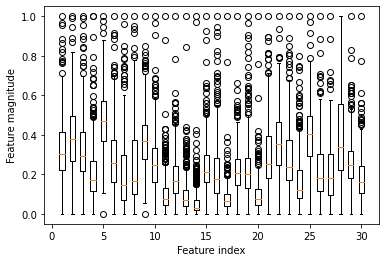

In [128]:
plt.boxplot(X_train_scaled, manage_ticks=False)
# plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

StandardScaler

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0, 0.5, 'Feature magnitude')

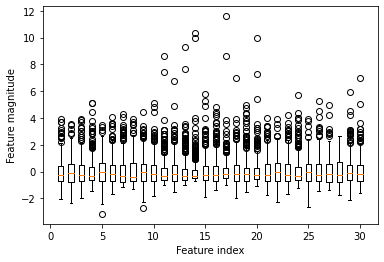

In [131]:
plt.boxplot(X_train_scaled, manage_ticks=False)
# plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
#평균이 0 sd = 1 =>hyperparameter 같은 느낌 민맥스, 스탠다드 고르기는.

varying hyperparameter C and gamma

In [132]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=10)

In [133]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
training_accuracy = []
test_accuracy = []

C_settings = [0.01, 1, 100]
gamma_settings = [0.01, 0.1, 1] #exponential 하게 증가.
for C in C_settings:
    for gamma in gamma_settings:
        svc = SVC(C=C, kernel = 'rbf', gamma = gamma)
        svc.fit(X_train_scaled, y_train)
        
        y_train_hat = svc.predict(X_train_scaled)
        y_test_hat = svc.predict(X_test_scaled)
        
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [135]:
#C와 gamma가 너무 높으면 overfitting , 반대로 underfitting
#서로 dependent한 변수들임. 그러므로 그것이 최적이라고 할 수 없다.
#그러므로 모든 조합. c와 gamma를 동시에 바꿔가며 setting해봐야함.

pd.DataFrame({"C":sorted(C_settings*3), "gamma":gamma_settings*3, "training accuracy": training_accuracy, "test accuracy": test_accuracy})

,C,gamma,training accuracy,test accuracy
0,0.01,0.01,0.624413,0.636364
1,0.01,0.10,0.624413,0.636364
2,0.01,1.00,0.624413,0.636364
3,1.00,0.01,0.971831,0.979021
4,1.00,0.10,0.988263,0.965035
5,1.00,1.00,1.000000,0.643357
6,100.00,0.01,0.992958,0.972028
7,100.00,0.10,1.000000,0.979021
8,100.00,1.00,1.000000,0.650350
